In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

1. Load the cleaned dataset from the last exercise. If you haven't saved the dataset, rerun the exercise and save the final dataset.

In [2]:
students = pd.read_csv('cleaned_dataset.csv')
students

,EthnicGroup,ParentEduc,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore,Gender_female,Gender_male,LunchType_free/reduced,LunchType_standard
0,2,1,1,1,1,1,3.0,1,1,71,71,74,1.0,0.0,0.0,1.0
1,2,5,1,1,2,1,0.0,2,0,69,90,88,1.0,0.0,0.0,1.0
2,1,3,1,2,2,1,4.0,1,1,87,93,91,1.0,0.0,0.0,1.0
3,0,0,1,1,0,0,1.0,2,0,45,56,42,0.0,1.0,1.0,0.0
4,2,5,1,1,2,1,0.0,1,0,76,78,75,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29112,3,2,1,2,2,0,2.0,1,0,59,61,65,1.0,0.0,0.0,1.0
29113,4,2,1,2,1,0,1.0,0,0,58,53,51,0.0,1.0,0.0,1.0
29114,2,2,0,1,2,0,1.0,0,0,61,70,67,1.0,0.0,1.0,0.0
29115,3,0,0,1,1,0,3.0,1,0,82,90,93,1.0,0.0,0.0,1.0


2. a) Find the mean, median and average scores in mathematics, reading and writing. <br>
   b) Find the mean, median and average scores for males and females.<br>
   c) What is the coefficient of variation of the scores? <br>

In [3]:
#a)
mean_scores = students[['MathScore', 'ReadingScore', 'WritingScore']].mean()
median_scores = students[['MathScore', 'ReadingScore', 'WritingScore']].median()
average_scores = students[['MathScore', 'ReadingScore', 'WritingScore']].mean()

print(f"Mean scores:\n{mean_scores}")
print(f"\nMedian scores:\n{median_scores}")
print(f"\nAverage scores:\n{average_scores}")

#b)
mean_scores_gender = students.groupby('Gender_female')[['MathScore', 'ReadingScore', 'WritingScore']].mean()
median_scores_gender = students.groupby('Gender_female')[['MathScore', 'ReadingScore', 'WritingScore']].median()
average_scores_gender = students.groupby('Gender_female')[['MathScore', 'ReadingScore', 'WritingScore']].mean()


print(f"\nMean scores by gender:\n{mean_scores_gender}")
print(f"\nMedian scores by gender:\n{median_scores_gender}")
print(f"\nAverage scores by gender:\n{average_scores_gender}")

#c)
coefficient_of_variation = (students[['MathScore', 'ReadingScore', 'WritingScore']].std() / students[['MathScore', 'ReadingScore', 'WritingScore']].mean()) * 100
print(f"\nCoefficient of Variation:\n{coefficient_of_variation}")

Mean scores:
MathScore       66.559948
ReadingScore    69.390081
WritingScore    68.429337
dtype: float64

Median scores:
MathScore       67.0
ReadingScore    70.0
WritingScore    69.0
dtype: float64

Average scores:
MathScore       66.559948
ReadingScore    69.390081
WritingScore    68.429337
dtype: float64

Mean scores by gender:
               MathScore  ReadingScore  WritingScore
Gender_female                                       
0.0            69.038488     65.824657     63.889866
1.0            64.119419     72.900825     72.899189

Median scores by gender:
               MathScore  ReadingScore  WritingScore
Gender_female                                       
0.0                 69.0          66.0          64.0
1.0                 64.0          73.0          73.0

Average scores by gender:
               MathScore  ReadingScore  WritingScore
Gender_female                                       
0.0            69.038488     65.824657     63.889866
1.0            64.119419     7

3. a) Use a statistical test to test the hypothesis:<br>
H0: the mean mathematical scores of females and males are equal.



In [4]:
#t-test (if p_value < alpha, reject H0)
female_scores = students[students['Gender_female'] == 1.0]['MathScore']
male_scores = students[students['Gender_male'] == 1.0]['MathScore']

t_stat, p_value = stats.ttest_ind(female_scores, male_scores, equal_var=False)

alpha = 0.05
print(t_stat)
print(p_value)

if p_value<alpha:
    print("p_value < alpha, reject the H0.")

-27.709781671935815
7.809675559975291e-167
p_value < alpha, reject the H0.


4. a) Use a statistical test to test the hypothesis:<br>
   H0 Gender did not affect the writing scores.<br>
   H1 Gender affected the writing score.<br>

In [5]:
#t-test (if p_value < alpha, reject H0)
female_scores = students[students['Gender_female'] == 1.0]['WritingScore']
male_scores = students[students['Gender_male'] == 1.0]['WritingScore']

t_stat, p_value = stats.ttest_ind(female_scores, male_scores, equal_var=False)

alpha = 0.05
print(t_stat)
print(p_value)

if p_value < alpha:
    print("p_value < alpha, reject the H0. Gender affected the writing scores.")

52.008547291894
0.0
p_value < alpha, reject the H0. Gender affected the writing scores.


5. a) Statisticaly test the distribuitions of female and male scores across the three scores columns.<br>
b) Plot the distributions for each of the separate scores in both genders. <br>

Kruskal-Wallis H Test Statistic: 5197.2356665647
P-value: 0.0
p_value < alpha, probably different distributions.


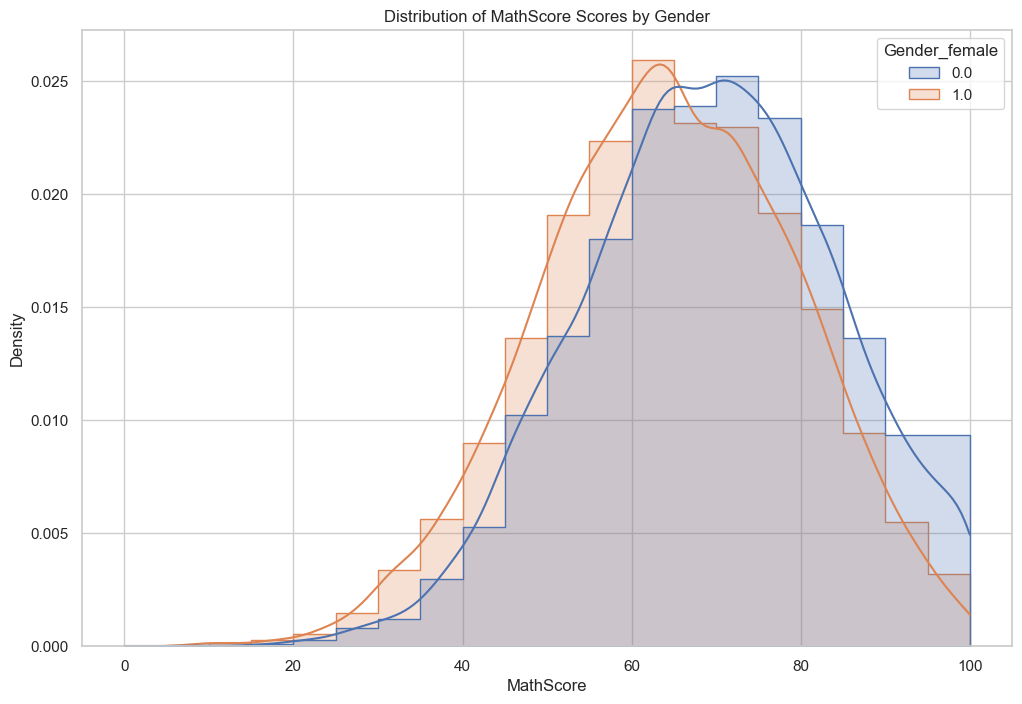

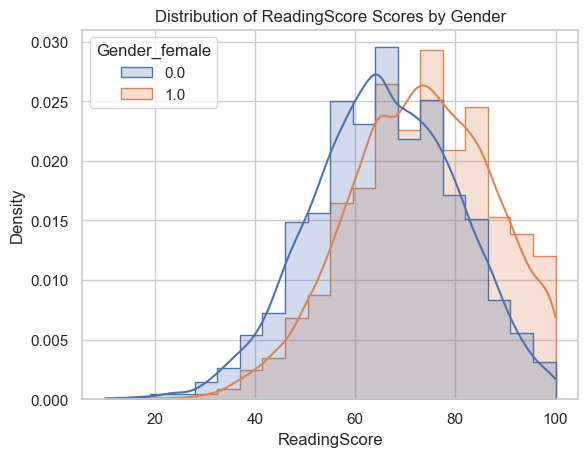

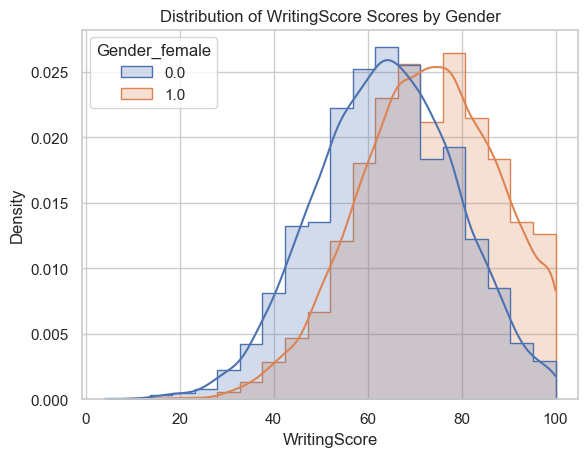

In [6]:
#Kruskal-Wallis test

female_scores = students[students['Gender_female'] == 1.0][['MathScore', 'ReadingScore', 'WritingScore']]
male_scores = students[students['Gender_female'] == 0.0][['MathScore', 'ReadingScore', 'WritingScore']]

# Kruskal-Wallis H Test
statistic, p_value = stats.kruskal(female_scores['MathScore'], female_scores['ReadingScore'], female_scores['WritingScore'],
                                   male_scores['MathScore'], male_scores['ReadingScore'], male_scores['WritingScore'])

alpha = 0.05

print(f"Kruskal-Wallis H Test Statistic: {statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("p_value < alpha, probably different distributions.")
else:
    print("Probably the same distribution.")

sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
for score_column in ['MathScore', 'ReadingScore', 'WritingScore']:
    sns.histplot(data=students, x=score_column, hue='Gender_female', kde=True, common_norm=False, stat="density", element="step", bins=20)
    plt.title(f'Distribution of {score_column} Scores by Gender')
    plt.show()